<a href="https://colab.research.google.com/github/praveenaiiisc/Text-Generation-with-Markov-Chains/blob/main/Text_Generation_with_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'grimm-tales:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5388427%2F8953558%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240721%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240721T110646Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8dd76ebe80bb4b02f9b44bff2984d13f9d938faccaf10bd56e738af601fc04b2dde2ab2d7a9f0dbd6fc01254c116a38db76ff9f7e814f4fb233b35309995ad5dffffb80aa1c1476502bd768db450774438ed130098e9de5aa0604dbcc8c42eb7a825cedf5fc915aedae117ec30ffc2b4131dce181c944460ae6659122d6a4776b15cadcd6bfa616207b615655d56350e5de7eceea51d17e34bd6c5aff84b0857eca506856136ecca720c740098e639dd1c9c7959cc88f9a554158b3c4de8d37be428fa04bd8ba9d513cfd027031245999e88f73149f593490de51e45ae28e757b832a82288d84d92a7f24c7e7e47f20445906fa1045c73d45dbbfeab1adca2b2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 247929 bytes downloaded
Downloaded and uncompressed: grimm-tales
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
files = ['/kaggle/input/grimm-tales/grimm_tales.txt']

text = ""

for f in files:
  with open(f, 'r') as f:
    text += f.read()

print(text[:500])

THE GOLDEN BIRD

A certain king had a beautiful garden, and in the garden stood a tree
which bore golden apples. These apples were always counted, and about
the time when they began to grow ripe it was found that every night one
of them was gone. The king became very angry at this, and ordered the
gardener to keep watch all night under the tree. The gardener set his
eldest son to watch; but about twelve o’clock he fell asleep, and in
the morning another of the apples was missing. Then the second


Weather as a Markov Chain
-------------------------

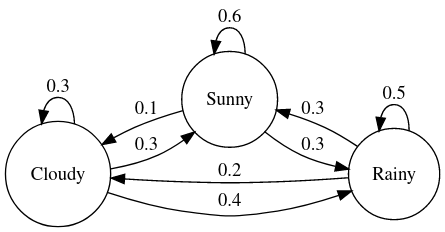

Matrix representation (rows are current state, columns are next state):

| | Sunny | Cloudy | Rainy |
| --- | --- | --- | --- |
| **Sunny** | 0.6 | 0.1 | 0.3 |
| **Cloudy** | 0.3 | 0.3 | 0.4 |
| **Rainy** | 0.3 | 0.2 | 0.5 |


Text as a Markov Chain
----------------------

**The cat ran over the dog.**

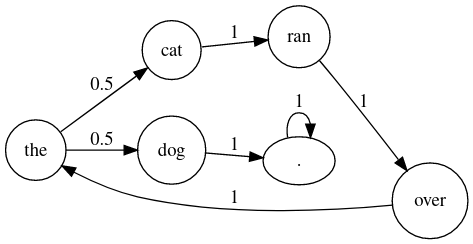

Matrix representation (rows are current state, columns are next state):

| | the | cat | ran | over | dog | . |
| --- | --- | --- | --- | --- | --- | --- |
| **the** | 0 | 0.5 | 0 | 0 | 0.5 | 0 |
| **cat** | 0 | 0 | 1 | 0 | 0 | 0 |
| **ran** | 0 | 0 | 0 | 1 | 0 | 0 |
| **over** | 1 | 0 | 0 | 0 | 0 | 0 |
| **dog** | 0 | 0 | 0 | 0 | 0 | 1 |
| **.** | 0 | 0 | 0 | 0 | 0 | 1 |



Define states as the distinct word tokens

In [6]:
# tokens = text.lower().split()
# distinct_states = list(set(tokens))

import re
text = re.sub("[^A-z,.!?'\n ]+", "", text)
text = re.sub("([.,!?])", r" \1 ", text)
tokens = text.lower().split()
distinct_states = list(set(tokens))
distinct_states[:10]

['want',
 'respect',
 'briskly',
 'lofty',
 'count',
 'off',
 'bowl',
 'lathe',
 'treatment',
 'visit']

Define transition matrix

In [9]:
from scipy.sparse import csr_matrix

m = csr_matrix((len(distinct_states), len(distinct_states)), dtype=int)

state_index = dict(
    [(state, idx_num) for idx_num, state in enumerate(distinct_states)]
)

Count transitions and fill in transition matrix

In [10]:
for i in range(len(tokens) - 1):
  row = state_index[tokens[i]]
  col = state_index[tokens[i + 1]]
  m[row, col] += 1

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Generate new text

In [12]:
import numpy as np

start_state_index = np.random.randint(len(distinct_states))
state = distinct_states[start_state_index]
num_sentences = 0
# output = state
output = state.capitalize()
capitalize = False

while num_sentences < 3:

  row = m[state_index[state], :]
  probabilities = row / row.sum()
  probabilities = probabilities.toarray()[0]


  next_state_index = np.random.choice(
      len(distinct_states),
      1,
      p=probabilities
  )                             # generate one sample from np.range(distinct_states)
  next_state = distinct_states[next_state_index[0]]

  if next_state in ('.', '!', '?'):
    output += next_state + '\n\n'
    capitalize = True
    num_sentences += 1
  elif next_state == ",":
    output += next_state
  else:
    if capitalize:
      output += next_state.capitalize()
      capitalize = False
    else:
      output += " " + next_state


  # output += ' ' + next_state

  # if next_state[-1] in ('.', '!', '?'):
  #   num_sentences += 1
  #   output += '\n\n'

  state = next_state

print(output)

Gore him, and wept still and the judge, said that we go down her but the wild animals came and they too.

The son came just as she came he were travelling companion took a queen had seen of this way he says that the hills and should go your hundred years without mercy!

Then he found themselves, she is fairest of the pig, said she laid, that soon as he were all of me well pleased, went on the child, he might not yourself, i will peck you any more be a while?




k-Word Markov Chain
-------------------

**The cat ran over the dog.**

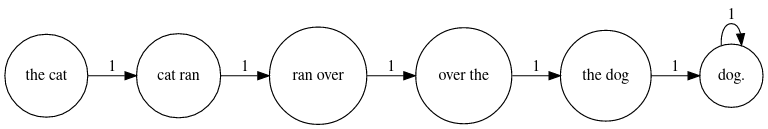

Matrix representation (rows are current state, columns are next state):

| | the cat | cat ran | ran over | over the | the dog | dog. |
| --- | --- | --- | --- | --- | --- | --- |
| **the cat**  | 0 | 1 | 0 | 0 | 0 | 0 |
| **cat ran**  | 0 | 0 | 1 | 0 | 0 | 0 |
| **ran over** | 0 | 0 | 0 | 1 | 0 | 0 |
| **over the** | 0 | 0 | 0 | 0 | 1 | 0 |
| **the dog**  | 0 | 0 | 0 | 0 | 0 | 1 |
| **dog.**     | 0 | 0 | 0 | 0 | 0 | 1 |



Define states as consecutive token pairs

In [15]:
k = 3
tokens = text.lower().split()
states = [ tuple(tokens[i:i+k]) for i in range(len(tokens)-k+1)]
distinct_states = list(set(states))
distinct_states[:10]

[('she', 'stayed', 'on'),
 ('this', 'purpose', 'indeed'),
 ('broad', 'gateway', 'but'),
 ('agreed', 'to', 'the'),
 ('daughter', 'could', 'spin'),
 ('journeyed', 'on', 'day'),
 ('a', 'pickaxe', 'exactly'),
 ('to', 'crack', 'upon'),
 ('just', 'emptied', ','),
 ('away', ',', 'till')]

Define and fill transition matrix

In [14]:
from scipy.sparse import csr_matrix
m = csr_matrix(
    (len(distinct_states), len(distinct_states)),
    dtype=int
)

state_index = dict(
    [ (state, idx_num) for idx_num, state in enumerate(distinct_states)]
)

for i in range(len(tokens)-k):
  state = tuple(tokens[i:i+k])
  next_state = tuple(tokens[i+1:i+k+1])
  row = state_index[state]
  col = state_index[next_state]
  m[row, col] += 1

Generate new text

In [19]:
import numpy as np

start_state_index = np.random.randint(len(distinct_states))
state = distinct_states[start_state_index]
num_sentences = 0
# output = state
output = ' '.join(state).capitalize()
capitalize = False

while num_sentences < 3:

  row = m[state_index[state], :]
  probabilities = row / row.sum()
  probabilities = probabilities.toarray()[0]


  next_state_index = np.random.choice(
      len(distinct_states),
      1,
      p=probabilities
  )
  next_state = distinct_states[next_state_index[0]]

  if next_state[-1] in ('.', '!', '?'):
    output += next_state[-1] + '\n\n'
    capitalize = True
    num_sentences += 1
  elif next_state[-1] == ",":
    output += next_state[-1]
  else:
    if capitalize:
      output += next_state[-1].capitalize()
      capitalize = False
    else:
      output += " " + next_state[-1]

  # output += ' ' + next_state

  # if next_state[-1] in ('.', '!', '?'):
  #   num_sentences += 1
  #   output += '\n\n'

  state = next_state

print(output)

Warm and bright the sun is, and yet cannot even carry the tree!

They went on into the wood, he met the fox, today.

Then the huntsman did as the old woman had got me into the pan, i should have a little peace.


